In [11]:
# This configures the notebook to automatically reload code when it is changed in imported functions.
%reload_ext autoreload
%autoreload 2

# Import all we need
import numpy as np
from matplotlib import pyplot as plt

from utils import plotCase, loadDataSet, selectTrainingSamples, calcConfusionMatrix, calcAccuracy, plotResultDots, plotResultsOCR
from classifiers import kNN

plt.rcParams['figure.facecolor']='white'

In [48]:
## Select which data to use:

# 1 = dot cloud 1
# 2 = dot cloud 2
# 3 = dot cloud 3
# 4 = OCR data

dataSetNr = 4  # Change this to load new data

# X - Data samples
# D - Desired output from classifier for each sample
# L - Labels for each sample
X, D, L = loadDataSet(dataSetNr)

# You can plot and study dataset 1 to 3 by running:
if dataSetNr in [1,2,3]:
    plotCase(X,L)

In [49]:
# Select a subset of the training samples
numBins = 2                     # Number of bins you want to divide your data into
numSamplesPerLabelPerBin = 100  # Number of samples per label per bin, set to inf for max number (total number is numLabels*numSamplesPerBin)
selectAtRandom = True           # true = select samples at random, false = select the first features

# Split data into bins based on the settings above.
# The outputs are lists of length numBins, where each item is a data array. Try printing for example XBins[0].shape.
XBins, DBins, LBins = selectTrainingSamples(X, D, L, numSamplesPerLabelPerBin, numBins, selectAtRandom)

# To extract a single bin from them use e.g.:
# XBin0 = XBins[0]
# Or to combine several bins into one matrix (good for cross validataion), use the numpy function concatenate:
# XBinComb = np.concatenate(XBins[0:4])
# This example combines 4 bins, nr 0 to 3.

# Add your own code to setup data for training and test here
XTrain = XBins[0]
XTest = XBins[1]
LTrain = LBins[0]
LTest = LBins[1] 


In [50]:
# Select a value for k, either ...

# ... set it manually
k = 1

# ... or find an optimal value using cross-validation (skip this until you have a working implementation of kNN)


In [51]:
from scipy.stats import mode 

def euclidian_distance(row_1, row_2):
        
        distance = np.sqrt(np.sum((row_1-row_2)**2))
        
        return(distance)


In [56]:
# Use kNN to classify data
# Note: you have to modify the kNN() function in classifiers.py yourself.

# Classify training data
LPredTrain = kNN(XTrain, k, XTrain, LTrain)
# Classify test data
LPredTest  = kNN(XTest , k, XTrain, LTrain)


In [57]:
# Calculate The Confusion Matrix and the Accuracy
# Note: you have to modify the calcConfusionMatrix() and calcAccuracy() functions in utils.py yourself.

# The confusion matrix
cM = calcConfusionMatrix(LPredTest, LTest)

# The accuracy
acc = calcAccuracy(cM)

# Print the results
print("Confusion matrix:")
print(cM)
print(f'Accuracy: {acc:.4f}')

Confusion matrix:
[[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  99.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   1.  98.   0.   0.   0.   0.   0.   0.   1.]
 [  0.   1.   0.  97.   0.   0.   0.   0.   1.   1.]
 [  0.   1.   0.   0.  97.   0.   1.   0.   0.   1.]
 [  0.   0.   0.   1.   0.  95.   0.   0.   0.   4.]
 [  0.   0.   0.   0.   1.   0.  99.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  97.   0.   3.]
 [  0.   6.   0.   1.   0.   0.   0.   0.  92.   1.]
 [  0.   0.   0.   1.   1.   2.   0.   1.   0.  95.]]
Accuracy: 0.9690


In [54]:
# Cross validation
for k_0 in range(1,10):
    classification_list = []
    for i in range(XTrain.shape[0]):
    
    
        out_put = kNN(np.array([XTrain[i,:]]) , k_0 , np.delete(XTrain , i, 0) , np.delete(LTrain,i))
        classification_list.append(out_put)
    classification_list = np.array(classification_list).flatten()
    # The accuracy
    cross_validation_number = calcAccuracy(calcConfusionMatrix(classification_list, LTrain))  
    print(k_0)
    print(cross_validation_number)

1
0.98
2
0.97
3
0.977
4
0.978
5
0.978
6
0.975
7
0.978
8
0.973
9
0.973


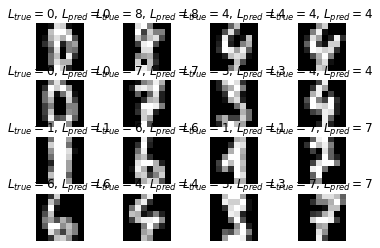

In [58]:
# Plot classifications
# Note: You should not have to modify this code

if dataSetNr < 4:
    plotResultDots(XTrain, LTrain, LPredTrain, XTest, LTest, LPredTest, 'kNN', [], k)
else:
    plotResultsOCR(XTest, LTest, LPredTest)